In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [58]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess

In [59]:
data_train = data_train.replace(['female','male'],[0,1])
data_train = data_train.replace(['S','C','Q'],[0,1,2])
data_train = data_train.fillna(10)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [60]:
X_train = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_train = np.array(data_train[['Survived']])

X_train.shape

(891, 5)

## Model

In [67]:
model = tf.keras.models.Sequential([
    Dense(5 , activation='sigmoid'),
    Dense(8 , activation='relu'),
    Dense(4 , activation='sigmoid'),
    Dense(2 , activation='softmax'),
])

In [68]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']
              )

### train

In [69]:
train_output = model.fit(X_train, Y_train ,epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 1ms/step - loss: 0.8618 - accuracy: 0.4444
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6173
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6218
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6308
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.6308
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6375
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6431
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6465
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6442
Epoch 11/

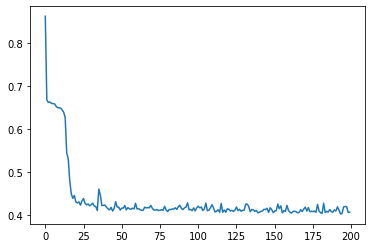

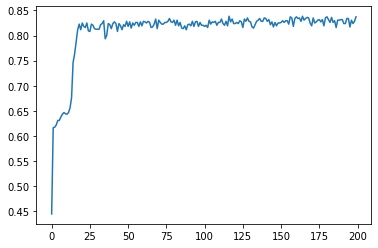

In [70]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [74]:
# X_test =
# Y_test =
# model.evaluate(X_test,Y_test)

In [75]:
jack = np.array([[1,1,36,0,0]])
result = model.predict(jack)
np.argmax(result)

0

In [78]:
model.save("my_titanic.h5")

In [79]:
model = tf.keras.models.load_model("my_titanic.h5")